<a href="https://colab.research.google.com/github/kaushikc19/DataengCS510/blob/main/DataEng%3A%20Gathering%20Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [6]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [7]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [8]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><im

In [9]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [10]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<

In [11]:
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td>Finishers:</td>, <td>577</td>]
[<td>Male:</td>, <td>414</td>]
[<td>Female:</td>, <td>163</td>]
[]
[<td>1</td>, <td>814</td>, <td>

                    JARED WILSON

                </td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>36:21</td>, <td>5:51</td>, <td>36:24</td>, <td></td>]
[<td>2</td>, <td>573</td>, <td>

                    NATHAN A SUSTERSIC

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>36:42</td>, <td>5:55</td>, <td>36:45</td>, <td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>]
[<td>3</td>, <td>687</td>, <td>

                    FRANCISCO MAYA

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>37:44</td>, <td>6:05</td>, <td>37:48</td>, <td></td>]
[<td>4</td>, <td>623</td>, <td>

                    PAUL MORROW

                </td>, <td>M</td>, <td>BEAVERTON</td>, <td>

bs4.element.ResultSet

In [12]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


In [13]:
import re

In [14]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [15]:
str

str

In [40]:
df = pd.DataFrame(list_rows)
df = df.replace('\r\n', '',regex=True)
df = df.replace('\n', '',regex=True)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON ..."
6,"[2, 573, NATHAN A SUSTERSI..."
7,"[3, 687, FRANCISCO MAYA ..."
8,"[4, 623, PAUL MORROW ..."
9,"[5, 569, DEREK G OSBORNE ..."


In [41]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,[3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [42]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [43]:
col_labels = soup.find_all('th')

In [44]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [45]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [46]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [47]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [48]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None


In [49]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


(583, 10)

In [50]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


(578, 10)

In [51]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [52]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [53]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [73]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
   myword = i.split(':')
   if len(myword)== 2:
      m, s = i.split(':', 1)
      h = 0
      math = (int(h) * 3600 + int(m) * 60 + int(s))/60
      time_mins.append(math)
   if len(myword)== 3:
      h, m, s = i.split(':',2)
      math = (int(h) * 3600 + int(m) * 60 + int(s))/60
      time_mins.append(math)

print(time_mins)



[36.35, 36.7, 37.733333333333334, 38.56666666666667, 39.35, 39.81666666666667, 40.06666666666667, 40.083333333333336, 40.28333333333333, 40.35, 40.46666666666667, 40.6, 40.71666666666667, 41.016666666666666, 41.31666666666667, 41.71666666666667, 41.983333333333334, 42.38333333333333, 42.483333333333334, 42.583333333333336, 42.6, 42.61666666666667, 42.93333333333333, 43.43333333333333, 43.45, 43.666666666666664, 43.7, 43.71666666666667, 43.766666666666666, 43.766666666666666, 43.78333333333333, 43.78333333333333, 44.06666666666667, 44.083333333333336, 44.1, 44.11666666666667, 44.38333333333333, 44.63333333333333, 44.68333333333333, 44.7, 44.8, 45.05, 45.083333333333336, 45.166666666666664, 45.18333333333333, 45.18333333333333, 45.21666666666667, 45.233333333333334, 45.25, 45.28333333333333, 45.45, 45.46666666666667, 45.483333333333334, 45.6, 45.6, 45.666666666666664, 45.666666666666664, 45.81666666666667, 45.916666666666664, 46.03333333333333, 46.21666666666667, 46.333333333333336, 46.3

In [74]:
df7['Runner_mins'] = time_mins
df7.head()


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...,39.350000


In [75]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x7fc531593320>], [Text(0, 0, 'Runners')])

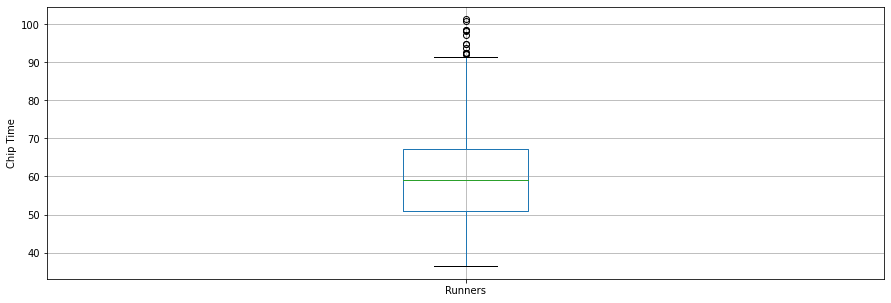

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


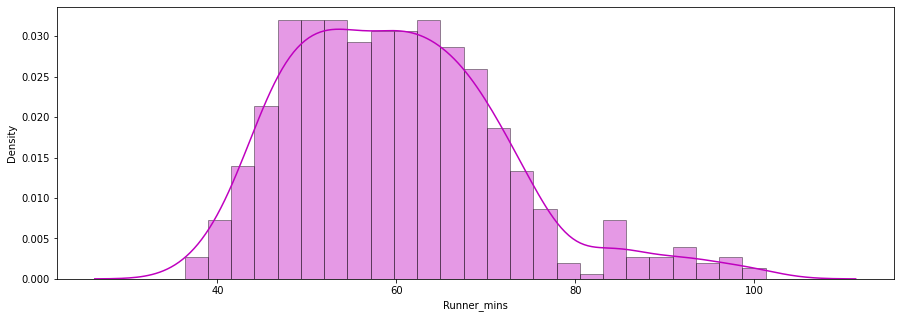

In [77]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


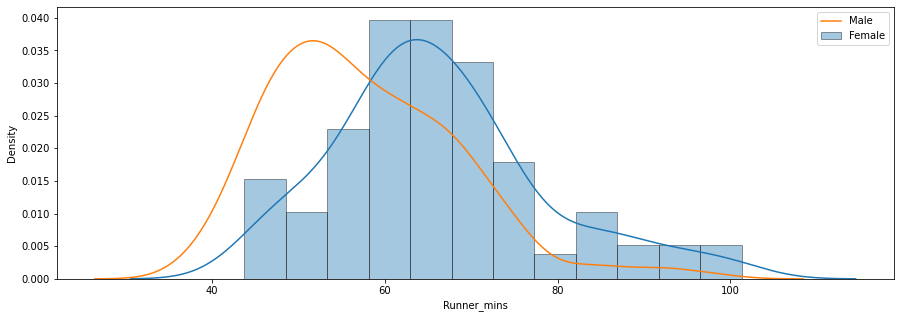

In [78]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [79]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                        ...                                  
              count       mean        std  ...        50%        75%         max
 Gender                                    ...                                  
 F            163.0  66.119223  12.184440  ...  64.616667  72.058333  101.300000
 M            414.0  57.640821  11.011857  ...  55.791667  64.804167   98.516667

[2 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

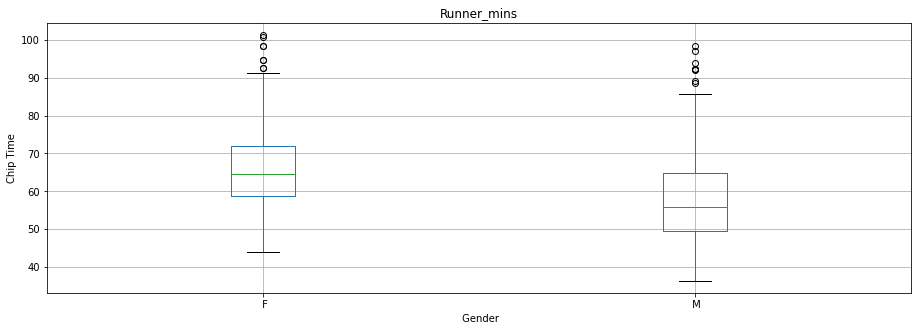

In [80]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")